# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

# NAME=USAMA AWAIS ......... ID=S2023393006

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df_districts_house_prices = pd.read_csv(r"C:\New folder\districts_house_prices.csv")
df_person_data = pd.read_csv(r"C:\New folder\person_data.csv")
df_person_district = pd.read_csv(r"C:\New folder\person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [ ]:
df_person_district

df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [ ]:
df_districts_house_prices

df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [ ]:
df_person_data

## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: xlabel='district', ylabel='house_price'>

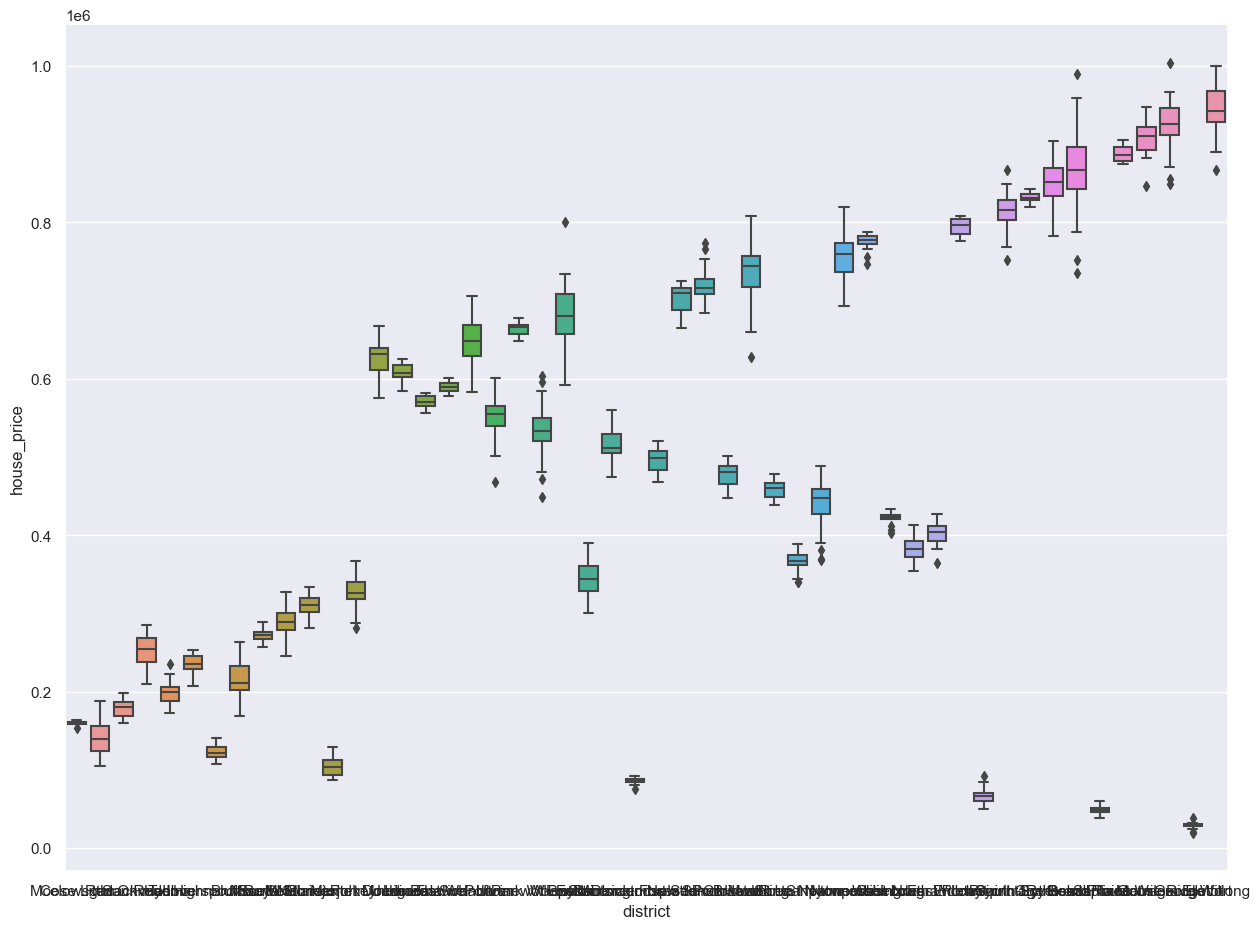

In [17]:
val=list(df_districts_house_prices['district'].unique())
val2 = list(df_districts_house_prices['house_price'])
fig = sns.set(rc={'figure.figsize':(15,11)})
sns.boxplot(x="district", y="house_price", data =df_districts_house_prices )

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [27]:
olddf = df_person_district.merge(df_person_data,how='left')
old=df_districts_house_prices.groupby('district').mean()
old2 = olddf.merge(old, on = 'district',how='left')
old2

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool,18.0,0,2,0,0,20.693273,234815.791667,12.5
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool,28.0,0,3,0,0,22.412490,234815.791667,12.5
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven,20.0,1,72,0,0,299.187025,551981.939394,17.0
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey,32.0,1,58,1,3,20.367141,178845.551724,15.0
...,...,...,...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel,32.0,4,62,1,2,21.378288,216158.522727,22.5
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar,36.0,0,53,1,1,3.707476,123255.384615,14.5
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool,19.0,0,1,1,0,23.809075,234815.791667,12.5
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar,31.0,2,49,3,2,15.708397,123255.384615,14.5


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

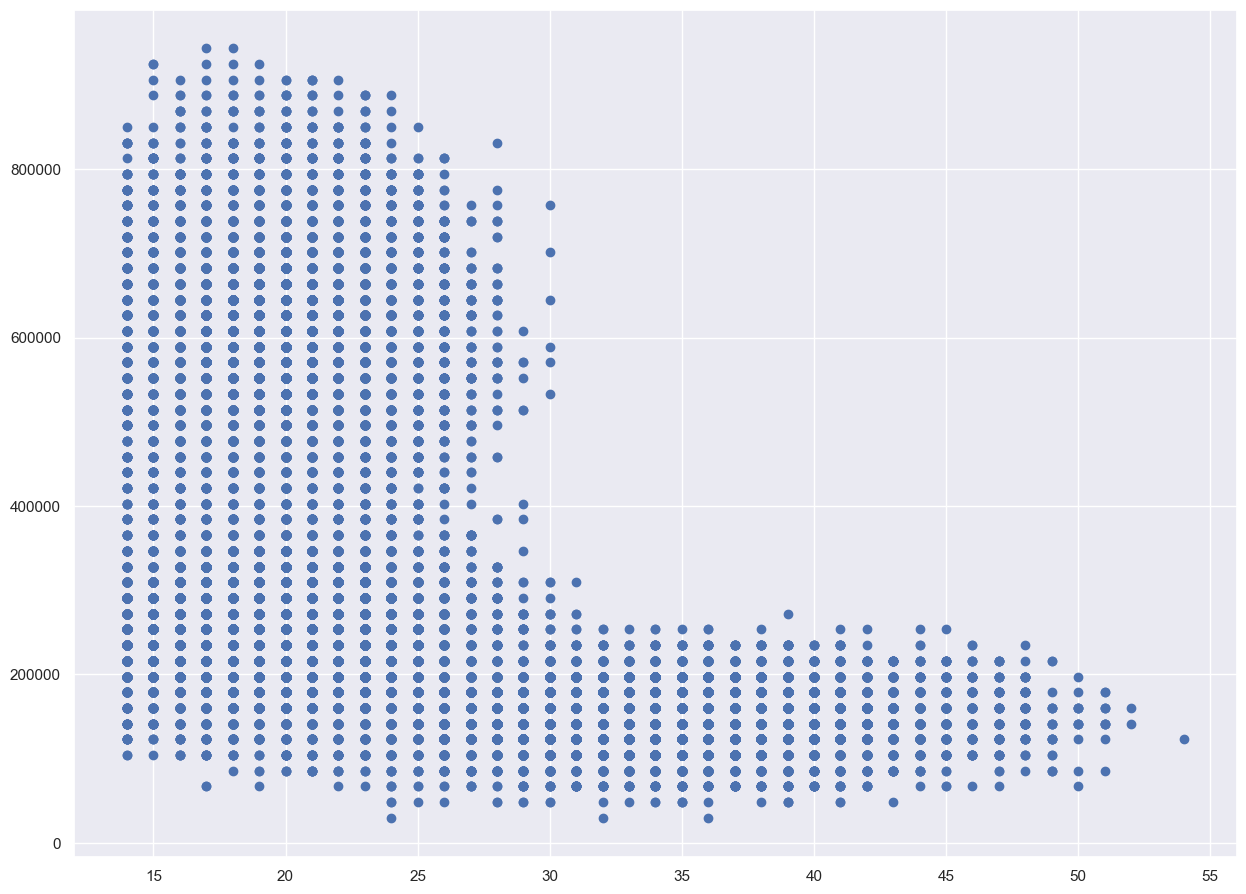

In [28]:
x=old2['age']
y=old2['house_price']
plt.scatter(x,y)

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [29]:
round(old2[old2["n_kids"]==2].shape[0]/ old2.shape[0]*100,2)

10.02

### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [30]:
import warnings
warnings.filterwarnings('ignore')
round(old2[old2["n_kids"]<2][old2["n_vg"]>10].shape[0]/old2.shape[0]*100,2)

28.76

### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

(array([5.4999e+04, 3.0000e+00, 1.0000e+01, 8.8000e+01, 5.4900e+02,
        2.3210e+03, 5.7330e+03, 4.9430e+03, 1.2440e+03, 1.1000e+02]),
 array([  1.90703456,  51.6525638 , 101.39809305, 151.14362229,
        200.88915153, 250.63468078, 300.38021002, 350.12573927,
        399.87126851, 449.61679776, 499.362327  ]),
 <BarContainer object of 10 artists>)

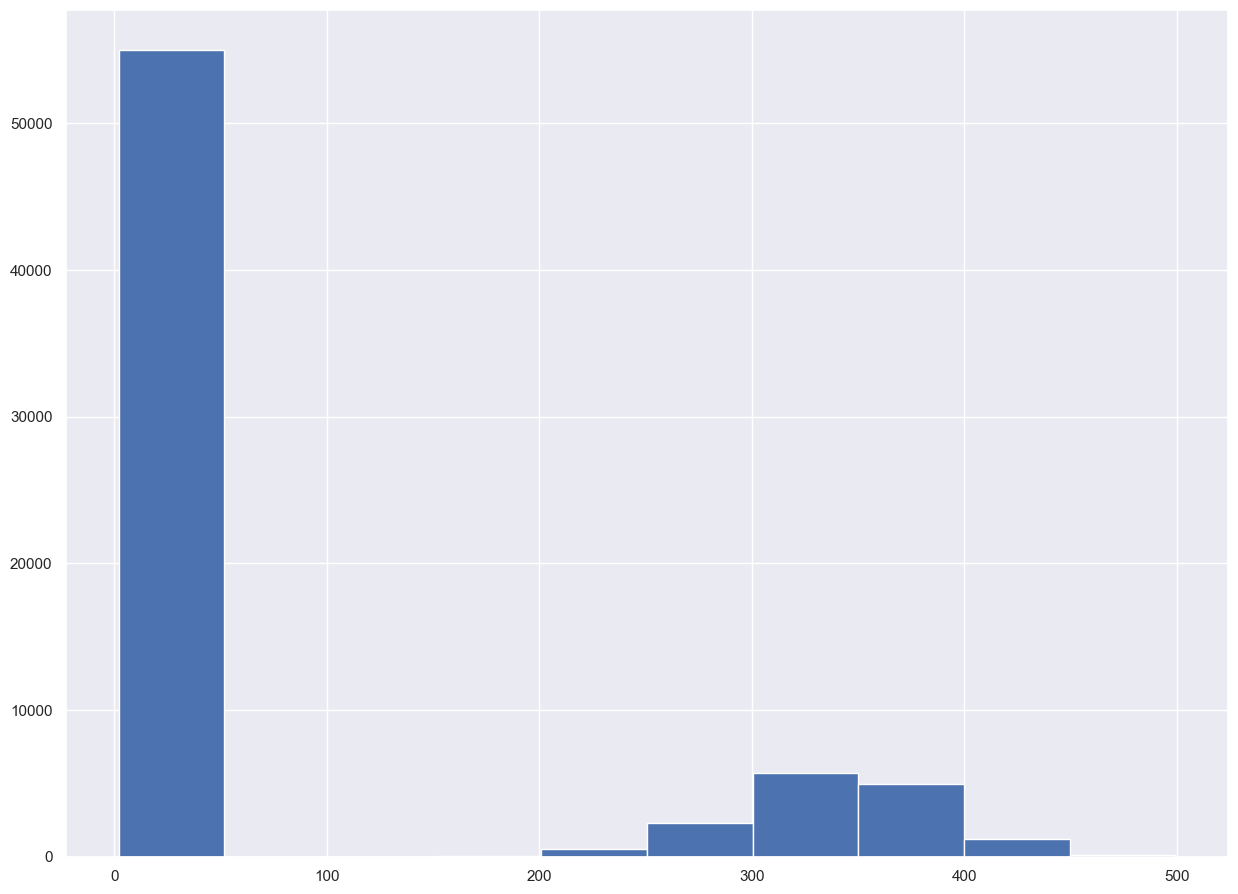

In [31]:
plt.hist(old2['n_hours_playing'])

As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

(array([5.000e+00, 7.000e+00, 5.400e+01, 2.380e+02, 1.110e+03, 3.454e+03,
        5.634e+03, 3.629e+03, 7.910e+02, 8.100e+01]),
 array([ 50.64705223,  95.51857971, 140.39010718, 185.26163466,
        230.13316214, 275.00468962, 319.87621709, 364.74774457,
        409.61927205, 454.49079952, 499.362327  ]),
 <BarContainer object of 10 artists>)

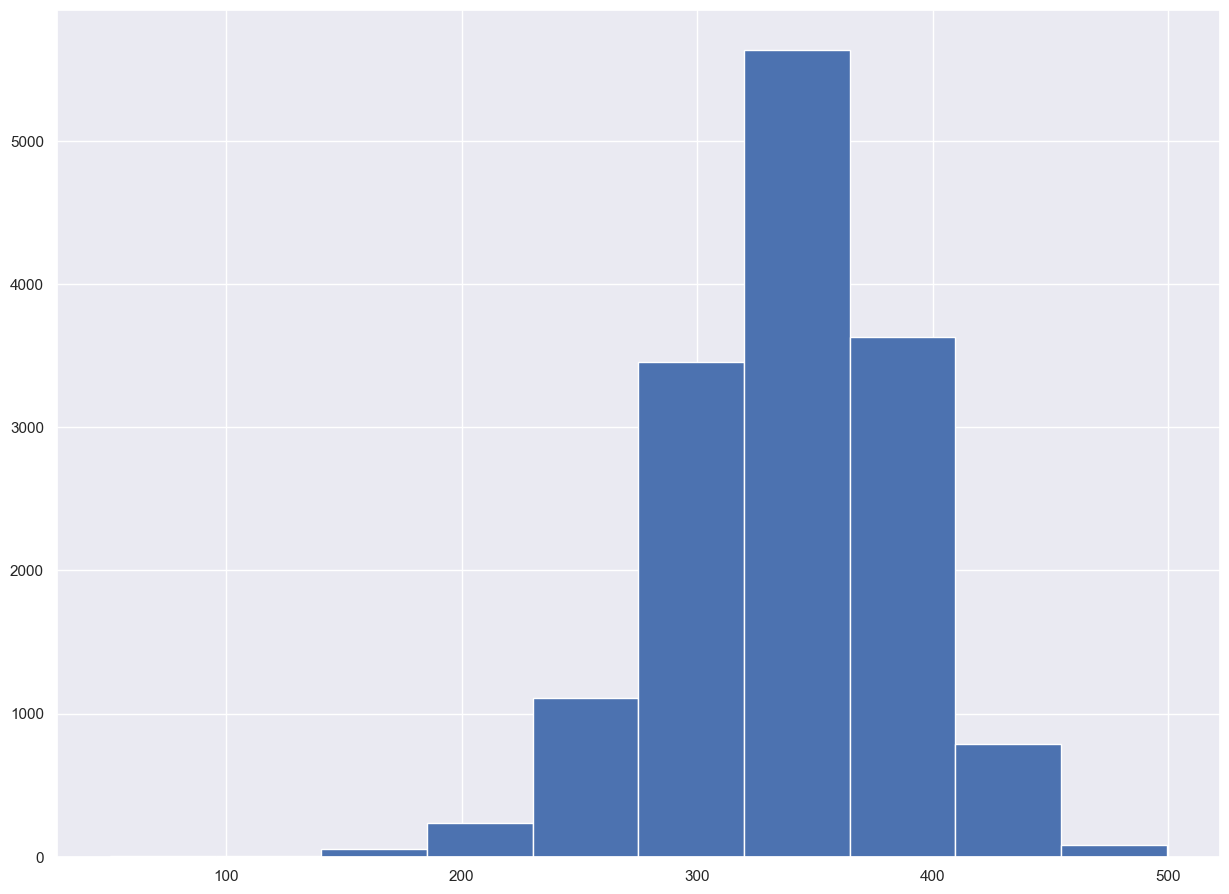

In [33]:
old3=old2.drop(old2[(old2['n_hours_playing']<50)].index)
old3.describe().T
val=old3["n_hours_playing"]
plt.hist(val)

# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [36]:
old2

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool,18.0,0,2,0,0,20.693273,234815.791667,12.5
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool,28.0,0,3,0,0,22.412490,234815.791667,12.5
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven,20.0,1,72,0,0,299.187025,551981.939394,17.0
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey,32.0,1,58,1,3,20.367141,178845.551724,15.0
...,...,...,...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel,32.0,4,62,1,2,21.378288,216158.522727,22.5
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar,36.0,0,53,1,1,3.707476,123255.384615,14.5
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool,19.0,0,1,1,0,23.809075,234815.791667,12.5
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar,31.0,2,49,3,2,15.708397,123255.384615,14.5


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame "df_person_hours" with columns: person_id, hours_played, and other relevant features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_person_hours.drop(['person_id', 'hours_played'], axis=1),
                                                    df_person_hours['hours_played'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear Regression): {mse}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a DataFrame "df_person_hours" with columns: person_id, hours_played, and other relevant features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_person_hours.drop(['person_id', 'hours_played'], axis=1),
                                                    df_person_hours['hours_played'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Random Forest Regression): {mse}")
